### facebook에서 공개한 단어 벡터 모델(영어, 한국어) 다운로드

In [0]:
# 영어 단어 벡터 모델 다운
!curl -LO https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
!unzip wiki.en.zip -d /content/wiki.en

# 한글 단어 벡터 모델 다운
!curl -LO https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ko.zip
!unzip wiki.ko.zip -d /content/wiki.ko

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 72 9877M   72 7184M    0     0  57.4M      0  0:02:51  0:02:05  0:00:46 51.8M^C
Archive:  wiki.en.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of wiki.en.zip or
        wiki.en.zip.zip, and cannot find wiki.en.zip.ZIP, period.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  3 4859M    3  178M    0     0  44.7M      0  0:01:48  0:00:03  0:01:45 44.7M^C
Archive:  wiki.ko.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it co

### 라이브러리 임포트

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

### wiki.en.vec 모델 load

In [0]:
model = KeyedVectors.load_word2vec_format('/content/wiki.en/wiki.en.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### most_similar() 함수를 이용하여 입력한 단어와 유사한 10개 의단어를 조회
* 모델 내부적으로 코사인 유사도를 이용하여 유사한 단어를 선택함

In [0]:
model.most_similar('obama')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('barack', 0.9457594752311707),
 ('obama,', 0.7994177341461182),
 ('obamas', 0.7797714471817017),
 ('obama/mccain', 0.778380274772644),
 ('→barack', 0.777340292930603),
 ('obamaca', 0.7450182437896729),
 ('obama/', 0.7410601377487183),
 ('obama/biden', 0.7401118278503418),
 ('clinton/obama', 0.7303953766822815),
 ('biden', 0.7299132347106934)]

In [0]:
model.most_similar('banana')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bananas', 0.7954647541046143),
 ('bananana', 0.7523452639579773),
 ('banana$', 0.7323664426803589),
 ('pineapples', 0.694901704788208),
 ('pineapple', 0.694143533706665),
 ('bananaa', 0.6828627586364746),
 ('#bananas', 0.6816795468330383),
 ('coconuts', 0.6765007376670837),
 ('coconut', 0.6622039675712585),
 ('‘banana', 0.6594932079315186)]

In [0]:
model.most_similar(negative='banana')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('βσ', 0.0677332878112793),
 ('ἐπ', 0.051104217767715454),
 ('琳', 0.05020735785365105),
 ('茂林镇', 0.049682341516017914),
 ('按鶴', 0.04730008915066719),
 ('🍂', 0.04575178027153015),
 ('ỏ', 0.04472777247428894),
 ('麥芽糖', 0.043751295655965805),
 ('원주', 0.03342342749238014),
 ('دفن', 0.03181014955043793)]

In [0]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


queen: 0.6606


### most_similar(positive=, negative=) 함수를 이용하여 아날로지 테스트 수행
  * x1 과 x2 사이의 관계를 y1에 적용

In [0]:
def analogy(x1, x2, y1):
    result = model.most_similar_cosmul(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [0]:
analogy('japan', 'japanese', 'australia')

'australian'

In [0]:
analogy('australia', 'beer', 'france')

'cognac'

In [0]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [0]:
analogy('tall', 'tallest', 'long')

'#longest'

In [0]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### 단어 임베딩을 PCA 알고리즘을 이용하여 2차원으로 축소 후 시각화 함수 정의

In [0]:
def display_pca_scatterplot(model, words=None, sample=0):
    # 사용자에게 입력 받은 words 없을 시 model 에서 샘플링
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    # words 리스트에 담겨 있는 단어를 model에 전달하여 해당 단어의 벡터 값 조회    
    word_vectors = np.array([model[w] for w in words])

    # word_vectors 에 담겨 있는 단어 벡터를 PCA 알고리즘을 이용해 중요도 순으로 축 정보를 변경 후
    # 상위 2개의 축에 해당하는 정보만 가져와서 2차원으로 차원축소
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    # 6X6 사이즈로 차트의 크기 설정
    plt.figure(figsize=(6,6))

    # 2차원으로 차원 축소된 단어 벡터를 산점도 차트로 시각화
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')

    # 산점도에 그려진 각 각의 점마다 해당 점의 단어 텍스트 정보 추가
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

* 아래 단어 샘플들을 display_pca_scatterplot 함수에 전달하여 시각화

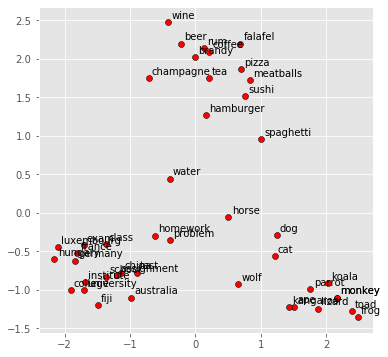

In [0]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text

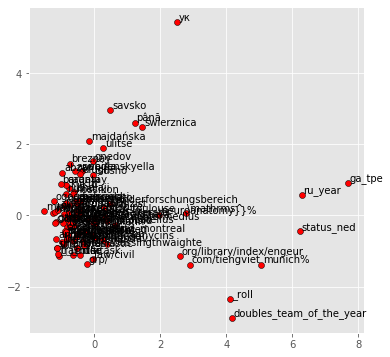

In [0]:
display_pca_scatterplot(model, sample=100)

### wiki.ko.vec 모델 load

In [0]:
model = KeyedVectors.load_word2vec_format('/content/wiki.ko/wiki.ko.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model.most_similar('일본')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('일본외', 0.7414600253105164),
 ('일본력', 0.7340863347053528),
 ('일본대', 0.7337802052497864),
 ('일본등', 0.7262907028198242),
 ('일본전국', 0.7255042791366577),
 ('일본외의', 0.7185568809509277),
 ('일본간에', 0.7079126834869385),
 ('일본주', 0.7012295722961426),
 ('일본령', 0.7009350061416626),
 ('일본행', 0.6990979909896851)]

In [0]:
analogy('일본', '일본어', '독일')

'독일어'

### Matplotlib 한글 폰트 설정
* 아래 셀 실행 시 바로 한글 폰트 적용됨

In [0]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 237 missing from current font.
  font.set_text(s, 0, flags=flags)


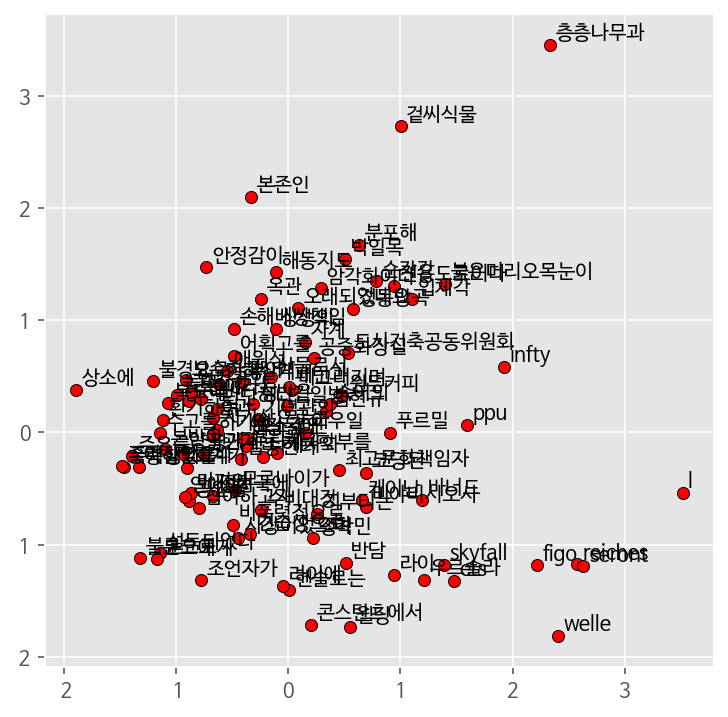

In [0]:
display_pca_scatterplot(model, sample=100)